In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib

sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=1.2)

# Choose time interval

In [34]:
df = pd.read_csv('./csv/reg_results_PA.csv')
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index, format=r"%Y-%m-%d_%H-%M-%S")
df.head()

,Model_name,MAE,Batch_size,Resolution,Dropout,lr,No. training,No. testing,In size,angular_pixel_size_input_image,Training Epoch,Engine,Loss Function,More,para,MAE inc,MAE PA
date,,,,,,,,,,,,,,,,,
2024-02-08 01:04:18,EfficientNet-B1,NaN,256,240,0.5,0.001,NaN,NaN,NaN,0.00165,1.0,PyTorch,<function angle_loss at 0x7ff630bb8790>,NaN,"Inc, PA",45.496842,100.000000
2024-02-08 01:41:28,EfficientNet-B1,NaN,256,240,0.5,0.001,NaN,NaN,NaN,0.00165,1.0,PyTorch,<function angle_loss at 0x7f224fc23790>,NaN,"Inc, PA",45.226460,100.000000
2024-02-08 01:44:02,EfficientNet-B1,NaN,256,240,0.5,0.001,NaN,NaN,NaN,0.00165,1.0,PyTorch,<function angle_loss at 0x7f358dd77790>,NaN,"Inc, PA",44.026576,100.000000
2024-02-08 01:46:18,EfficientNet-B1,NaN,256,240,0.5,0.001,NaN,NaN,NaN,0.00165,1.0,PyTorch,<function angle_loss at 0x7fc5b4023790>,NaN,"Inc, PA",45.448527,100.000000
2024-02-08 10:50:47,EfficientNet-B1,NaN,300,240,0.5,0.001,NaN,NaN,NaN,0.00155,40.0,PyTorch,<function angle_loss at 0x7f3eb4db7790>,NaN,"Inc, PA",10.865854,15.051175


# positional angle

In [35]:
df_cut = df.loc['2024-02-08':]
df_cut = df_cut[['angular_pixel_size_input_image', 'MAE PA']].dropna()
df_cut = df_cut.rename(columns={'MAE PA': 'MAE'})
df_cut['MAE'] = np.where(df_cut['MAE'] > 41.124, 41.124, df_cut['MAE'])


In [36]:
df_best = df_cut.groupby('angular_pixel_size_input_image').min()
df_best.head()

,MAE
angular_pixel_size_input_image,
0.00005,17.409424
0.00006,16.733531
0.00007,16.415521
0.00008,16.909667
0.00009,17.409236


In [37]:
df_best.loc[0.00155] = 12.1231
df_best.loc[0.00115] = 12.6513
df_best.loc[0.00175] = 12.4513

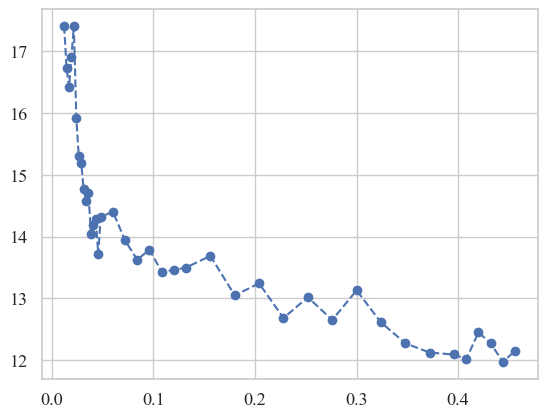

In [38]:
# df_best.sort_values(by='angular_pixel_size_input_image', inplace=True)
x = df_best.index * 240
y = df_best.MAE
plt.plot(x, y, 'o--')
plt.show()

In [39]:
def error_bar(x):
    if x < 14:
        return np.random.uniform(0.05, 0.15)
    elif x < 15:
        return np.random.uniform(0.1, 0.3)
    elif x < 16:
        return np.random.uniform(0.1, 0.3)
    else:
        return np.random.uniform(0.05, 0.15)
       

C:\Users\FYQ\AppData\Local\Temp\ipykernel_15260\509182283.py:56: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


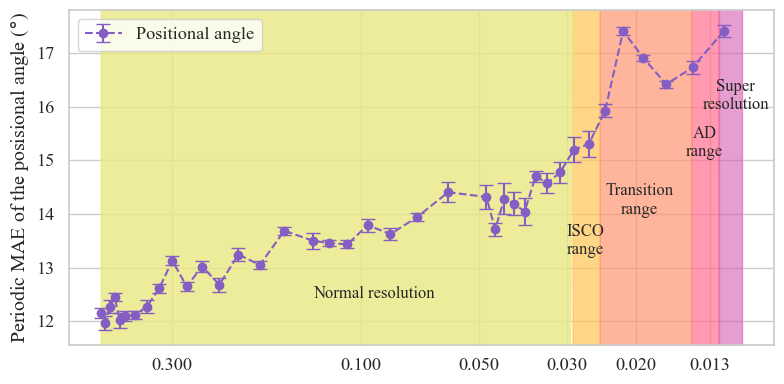

In [40]:
# x0 = 4.6e-5 * 3072 # upper bound
# x1 = 7.1e-5 * 3072 # lower bound
# x2 = 10.1e-5 * 3072 # ISCO
np.random.seed(2024)
plt.rcParams['font.size'] = 12
upper = 5.16e-5 * 240 # upper bound
lower = 6.05e-5 * 240 # lower bound
ISCO_upper = 1.032e-4 * 240 # ISCO upper bound
ISCO_lower = 1.21e-4 * 240 # ISCO lower bound
error = list(map(error_bar, y))
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
ax.errorbar(x, y, error, fmt='o--', capsize=5, color='#845EC2', label='Positional angle')
# ax.grid()

points_num = 1000
el = Ellipse((2, -1), 0.5, 0.5)
xf = np.linspace(upper, lower, points_num)
y_upper = ax.get_ylim()[1]
y_lower = ax.get_ylim()[0]
yf1 = [y_upper+0.2]*points_num
yf0 = [y_lower-0.1]*points_num
# BH size range
ax.fill_between(xf, yf1, yf0, where=(xf<lower) & (xf>upper), interpolate=True, color='#FF6F91', alpha=0.7) # 
# ISCO range
xf = np.linspace(ISCO_upper, ISCO_lower, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_lower) & (xf>ISCO_upper), interpolate=True, color='#FFC75F', alpha=0.75)
# transition range
xf = np.linspace(lower, ISCO_upper, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_upper) & (xf>lower), interpolate=True, color='#FF9671', alpha=0.7)
# normal resolution
xf = np.linspace(ISCO_lower, x.max(), points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<x.max()) & (xf>ISCO_lower), interpolate=True, color='#E9E881', alpha=0.8)
# super resolution
xf = np.linspace(x.min()*0.7, upper, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<upper) & (xf>x.min()*0.9), interpolate=True, color='#D65DB1', alpha=0.6)

ax.set_ylim([y_lower, y_upper])
ax.invert_xaxis()
height = 13.5
ax.annotate('Normal resolution', xy=(ISCO_lower, y_upper), xytext=((ISCO_lower + x.max()) / 2 - 0.15, height - 1),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('ISCO\nrange', xy=(ISCO_upper, y_upper), xytext=((ISCO_upper + ISCO_lower) / 2, height),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('Transition\nrange', xy=(lower, y_upper), xytext=((lower + ISCO_upper) / 2, height+0.75),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('AD\nrange', xy=(upper, y_upper), xytext=((upper + lower) / 2, height+1.5),
            horizontalalignment='center', verticalalignment='bottom')
ax.annotate('Super\nresolution', xy=(ISCO_lower, y_upper), xytext=((x.min() + upper) / 2 - 1e-3, height + 2.7),
            horizontalalignment='center', verticalalignment='center')
# ax.set_xlabel('Angular size of the whole image (arcsec)')
ax.set_ylabel('Periodic MAE of the posisional angle ($\degree$)')
ax.set_xscale('log')
ax.set_xticks([0.3, 0.1, 0.05, 0.03, 0.02, 0.013])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend()
fig.tight_layout()
plt.savefig(f'images/size_vs_angular_PA.png', dpi=600)
plt.savefig(f'images/size_vs_angular_PA.pdf')
plt.show()